DATA CREATION 

You’re working with synthetic weekly user activity logs from a SaaS product over ~6 months.

In [1]:
import pandas as pd
import numpy as np

np.random.seed(29)

weeks = pd.date_range(start="2024-01-01", periods=26, freq='W-MON')

df = pd.DataFrame({
    'Week': weeks,
    'Weekly_Signups': np.random.poisson(300, 26) + np.random.normal(0, 30, 26).astype(int),
    'Active_Users': np.random.poisson(1500, 26) + np.random.normal(0, 100, 26).astype(int),
    'Support_Tickets': np.random.poisson(80, 26) + np.random.normal(0, 15, 26).astype(int),
    'Crash_Rate_%': np.round(np.random.uniform(0.3, 1.8, 26), 2),
})

# Add slow drift to simulate a problem
df.loc[15:, 'Crash_Rate_%'] += np.linspace(0.1, 0.5, 11)
df.to_csv("product_trend_data.csv", index=False)


## Task:
1. Trend Analysis
- Plot and analyze:
    - Weekly Signups
    - Active Users
    - Support Tickets
    - Crash Rate (%)
- Identify any drift, trend, seasonality, or sudden spikes.

2. Detect Early Warning Signs
- Which metric shows subtle degradation before it becomes obvious?
- Around which week(s) do these signs appear?
- What’s the potential root cause hypothesis?

3. Propose a Monitoring Plan
- Define thresholds or anomalies to alert the team early
- Suggest a dashboard layout or KPI alert system



In [2]:
df.head()

,Week,Weekly_Signups,Active_Users,Support_Tickets,Crash_Rate_%
0,2024-01-01,248,1362,80,0.59
1,2024-01-08,271,1553,71,1.54
2,2024-01-15,286,1424,79,1.17
3,2024-01-22,278,1625,56,1.34
4,2024-01-29,245,1507,64,1.25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Week             26 non-null     datetime64[ns]
 1   Weekly_Signups   26 non-null     int64         
 2   Active_Users     26 non-null     int64         
 3   Support_Tickets  26 non-null     int64         
 4   Crash_Rate_%     26 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 1.1 KB


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

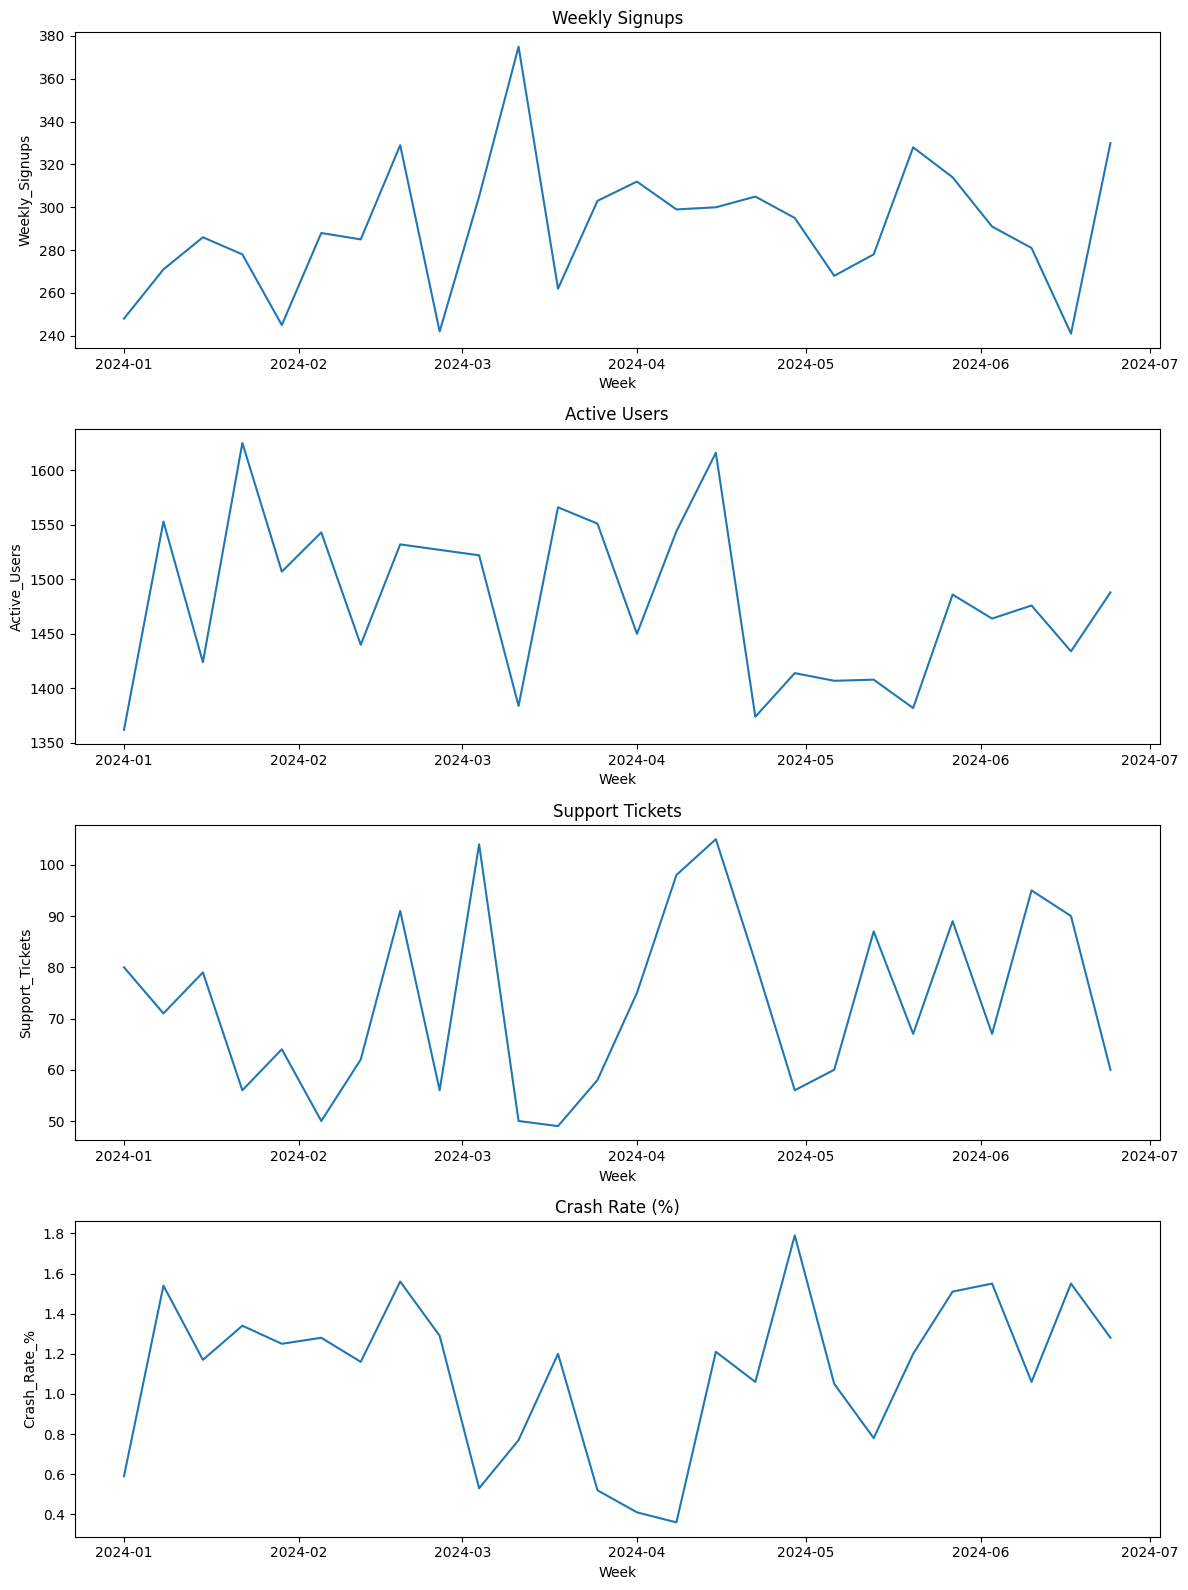

In [24]:
fig, axs = plt.subplots(4, 1, figsize=(12, 16), sharex=False)

sns.lineplot(data=df, x='Week', y='Weekly_Signups', ax=axs[0])
axs[0].set_title('Weekly Signups')

sns.lineplot(data=df, x='Week', y='Active_Users', ax=axs[1])
axs[1].set_title('Active Users')

sns.lineplot(data=df, x='Week', y='Support_Tickets', ax=axs[2])
axs[2].set_title('Support Tickets')

sns.lineplot(data=df, x='Week', y='Crash_Rate_%', ax=axs[3])
axs[3].set_title('Crash Rate (%)')

plt.tight_layout()
plt.show()


In [19]:
df_rolling = df.copy()
df_rolling[['Weekly_Signups', 'Active_Users', 'Support_Tickets', 'Crash_Rate_%']] = df_rolling[['Weekly_Signups', 'Active_Users', 'Support_Tickets', 'Crash_Rate_%']].rolling(window=3).mean()

In [20]:
df_rolling

,Week,Weekly_Signups,Active_Users,Support_Tickets,Crash_Rate_%
0,2024-01-01,NaN,NaN,NaN,NaN
1,2024-01-08,NaN,NaN,NaN,NaN
2,2024-01-15,268.333333,1446.333333,76.666667,1.100000
3,2024-01-22,278.333333,1534.000000,68.666667,1.350000
4,2024-01-29,269.666667,1518.666667,66.333333,1.253333
5,2024-02-05,270.333333,1558.333333,56.666667,1.290000
6,2024-02-12,272.666667,1496.666667,58.666667,1.230000
7,2024-02-19,300.666667,1505.000000,67.666667,1.333333
8,2024-02-26,285.333333,1499.666667,69.666667,1.336667
9,2024-03-04,292.000000,1527.000000,83.666667,1.126667


In [26]:
if df['Crash_Rate_%'].iloc[-1] > 1.5:
    print("ALERT: Crash rate too high")

if (df['Crash_Rate_%'].iloc[-1] - df['Crash_Rate_%'].iloc[-3]) > 0.2:
    print("ALERT: Crash rate increasing quickly")


ALERT: Crash rate increasing quickly
